<a href="https://colab.research.google.com/github/Sakthiprian/Gabor-segmentation/blob/main/gabor_filter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
image_folder = '/content/drive/MyDrive/pics'
image_files = os.listdir(image_folder)
image_files=sorted(image_files)
data = {'image_path': [os.path.join(image_folder, filename) for filename in image_files]}
df = pd.DataFrame(data)
df

,image_path
0,/content/drive/MyDrive/pics/AAA1.jpg
1,/content/drive/MyDrive/pics/AAB1.jpg
2,/content/drive/MyDrive/pics/AAC1.jpg
3,/content/drive/MyDrive/pics/AAD1.jpg
4,/content/drive/MyDrive/pics/AAE1.jpg
...,...
181,/content/drive/MyDrive/pics/APF1.jpg
182,/content/drive/MyDrive/pics/API1.jpg
183,/content/drive/MyDrive/pics/APT1.jpg
184,/content/drive/MyDrive/pics/APV1.jpg


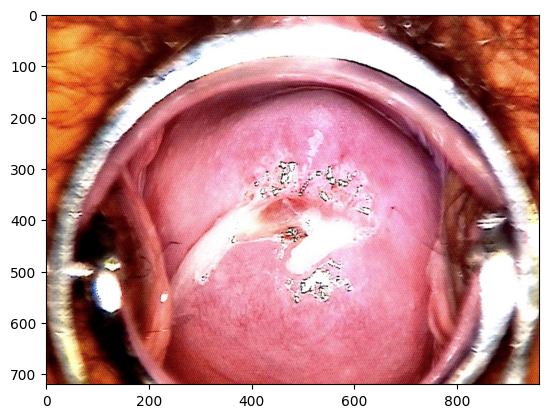

In [ ]:
path=df['image_path'].iloc[0]
original= cv2.imread(path)
rgb_image = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

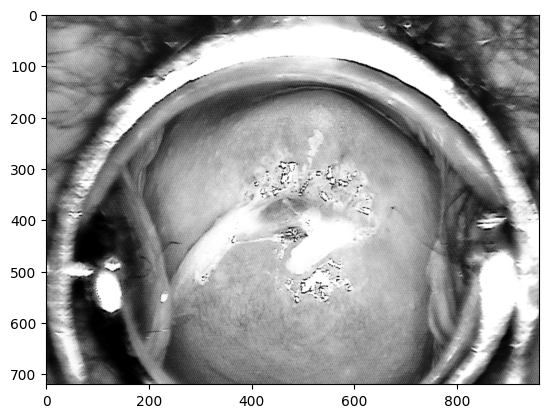

In [ ]:
img = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap=plt.cm.gray)

In [ ]:
ksize=20
sigma=3
theta=np.pi/4
lamda=np.pi/4
gamma=1
phi=0

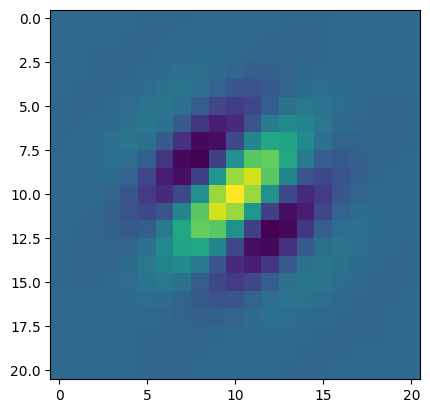

In [ ]:
kernel=cv2.getGaborKernel((ksize,ksize),sigma,theta,lamda,gamma,phi,ktype=cv2.CV_32F)
plt.imshow(kernel)

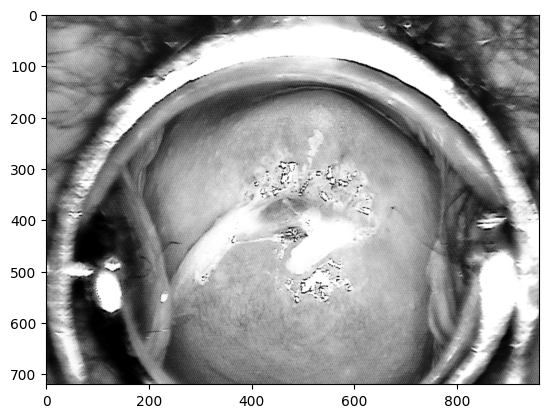

In [ ]:
fimg=cv2.filter2D(img,cv2.CV_8UC3,kernel)
plt.imshow(img,cmap=plt.cm.gray)

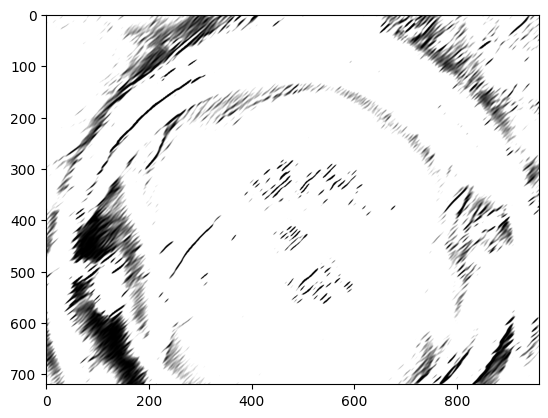

In [ ]:
plt.imshow(fimg,cmap=plt.cm.gray)

Tested and modified the size of the Gabor Kernel. A kernel of size 20 by 20 is seen to be most effective in identifying important features. This choice is made by visual inspection in order to reduce computation.

Moving on to generate a gabor filter bank.
Variations of gabor kernel are applied to each image in our dataset to generate a lot of texture based features.

In [ ]:
df

,image_path
0,/content/drive/MyDrive/pics/AAA1.jpg
1,/content/drive/MyDrive/pics/AAB1.jpg
2,/content/drive/MyDrive/pics/AAC1.jpg
3,/content/drive/MyDrive/pics/AAD1.jpg
4,/content/drive/MyDrive/pics/AAE1.jpg
...,...
181,/content/drive/MyDrive/pics/APF1.jpg
182,/content/drive/MyDrive/pics/API1.jpg
183,/content/drive/MyDrive/pics/APT1.jpg
184,/content/drive/MyDrive/pics/APV1.jpg


In [ ]:
import pandas as pd
import cv2
import numpy as np

# Create an empty DataFrame to store Gabor responses
num_gabor_filters = 32
gabor_columns = ['image_path']
gabor_columns.extend([f'Gabor{i}' for i in range(1, num_gabor_filters + 1)])

# Create a new DataFrame to store Gabor responses
df_gabor = pd.DataFrame(columns=gabor_columns)

# Iterate through the rows in the original DataFrame (assuming it's named df)
for index, row in df.iterrows():
    path = row['image_path']
    original = cv2.imread(path)
    img = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    gabor_responses = []  # Initialize a list to store Gabor responses

    for theta in range(4):
        theta = theta / 4.0 * np.pi
        for sigma in (3, 5):
            for lamda in np.arange(0, np.pi, np.pi / 4.0):
                for gamma in (0.05, 0.5):
                    gkernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                    fimg = cv2.filter2D(img, cv2.CV_8UC3, gkernel)
                    gabor_responses.append(fimg)  # Append each Gabor response image

    # Create a dictionary to add a new row to the DataFrame
    new_row = {'image_path': path}
    new_row.update({f'Gabor{i}': response for i, response in enumerate(gabor_responses, 1)})

    # Add the new row to the DataFrame
    df_gabor = df_gabor.append(new_row, ignore_index=True)

# Now, df_gabor contains 'image_path' and individual cells for each Gabor response image


In [ ]:
df_gabor

,image_path,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor55,Gabor56,Gabor57,Gabor58,Gabor59,Gabor60,Gabor61,Gabor62,Gabor63,Gabor64
0,/content/drive/MyDrive/pics/AAA1.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[42, 0, 0, 53, 0, 0, 171, 61, 0, 0, 196, 76, ...","[[116, 11, 0, 0, 26, 57, 54, 0, 0, 71, 135, 0,...","[[67, 0, 0, 64, 0, 0, 43, 28, 0, 14, 39, 0, 11...","[[21, 0, 0, 10, 10, 0, 7, 31, 0, 14, 35, 0, 1,...","[[17, 0, 0, 19, 0, 2, 1, 11, 0, 0, 25, 0, 36, ...","[[12, 0, 6, 0, 4, 3, 0, 27, 0, 12, 10, 0, 20, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[0, 96, 255, 13, 0, 141, 255, 16, 0, 87, 255,...","[[0, 32, 58, 0, 0, 171, 51, 0, 0, 242, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[169, 200, 255, 255, 255, 222, 141, 115, 145,...","[[113, 0, 112, 2, 77, 42, 50, 60, 52, 57, 48, ...","[[68, 0, 45, 0, 46, 10, 14, 17, 25, 24, 14, 13...","[[0, 80, 255, 32, 0, 112, 255, 35, 0, 29, 255,...","[[0, 37, 255, 0, 0, 123, 255, 0, 0, 124, 101, ..."
1,/content/drive/MyDrive/pics/AAB1.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[95, 12, 0, 0, 43, 87, 0, 0, 0, 107, 52, 0, 0...","[[66, 9, 0, 0, 28, 62, 0, 0, 0, 84, 33, 0, 0, ...","[[32, 0, 0, 23, 0, 9, 13, 0, 15, 0, 2, 3, 0, 2...","[[25, 0, 0, 18, 0, 7, 10, 0, 11, 0, 2, 8, 0, 2...","[[20, 0, 2, 10, 0, 0, 16, 0, 28, 0, 9, 5, 0, 7...","[[17, 0, 3, 6, 0, 0, 12, 0, 19, 0, 2, 8, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[91, 84, 57, 26, 60, 78, 30, 15, 71, 70, 11, ...","[[24, 10, 0, 0, 17, 43, 0, 0, 48, 25, 0, 6, 32...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[85, 86, 87, 92, 124, 171, 243, 255, 235, 146...","[[26, 46, 28, 35, 44, 22, 40, 18, 33, 22, 26, ...","[[4, 18, 7, 10, 21, 0, 22, 0, 19, 0, 12, 2, 8,...","[[46, 95, 103, 19, 43, 83, 48, 28, 71, 63, 16,...","[[0, 42, 52, 0, 14, 55, 3, 0, 57, 33, 0, 25, 6..."
2,/content/drive/MyDrive/pics/AAC1.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 10, 1, 0, 0, 2, 10, 0, 0, 3, 16, 0, 0,...","[[0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 5, 3, 0, 0, 10...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 8, 0, 1, 5, 0, 8, 0, 11, 0, 11, 0, 4, 5, ...","[[0, 4, 0, 0, 4, 0, 5, 0, 6, 0, 5, 0, 2, 2, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[77, 77, 74, 71, 76, 72, 72, 68, 71, 77, 70, ...","[[4, 4, 3, 1, 5, 6, 2, 0, 6, 6, 0, 2, 6, 4, 2,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[253, 245, 227, 205, 179, 152, 134, 139, 162,...","[[56, 42, 53, 45, 50, 46, 46, 50, 48, 50, 48, ...","[[21, 13, 19, 15, 18, 16, 16, 18, 16, 17, 17, ...","[[76, 76, 74, 72, 77, 69, 69, 69, 71, 74, 71, ...","[[25, 26, 25, 23, 27, 24, 21, 22, 26, 26, 23, ..."
3,/content/drive/MyDrive/pics/AAD1.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[72, 7, 0, 0, 40, 36, 0, 0, 21, 0, 0, 29, 13,...","[[50, 5, 0, 0, 26, 23, 0, 0, 8, 0, 0, 21, 5, 0...","[[23, 0, 0, 13, 0, 15, 0, 0, 33, 0, 0, 29, 0, ...","[[17, 0, 0, 9, 0, 9, 0, 0, 19, 0, 0, 19, 0, 0,...","[[19, 0, 5, 6, 0, 1, 15, 0, 26, 0, 1, 10, 0, 0...","[[16, 0, 6, 2, 0, 1, 7, 0, 14, 0, 0, 8, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[58, 53, 45, 49, 57, 59, 59, 54, 57, 67, 64, ...","[[7, 3, 0, 2, 4, 2, 3, 4, 0, 4, 7, 0, 0, 9, 3,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[255, 255, 255, 255, 255, 2

In [ ]:
df_gabor.drop(index=185,inplace=True)